<a href="https://colab.research.google.com/github/Songlahaha/tensor/blob/main/CNN_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds    # 導入tensorflow官方的資料集

In [3]:
dataset, dataset_info = tfds.load("malaria", with_info=True, as_supervised=True, shuffle_files=True, split=["train"])    # 載入資料集

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/27558 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/malaria/1.0.0.incompleteMQ3RBV/malaria-train.tfrecord*...:   0%|          …

Dataset malaria downloaded and prepared to /root/tensorflow_datasets/malaria/1.0.0. Subsequent calls will reuse this data.


In [ ]:
dataset

{Split('train'): <_PrefetchDataset element_spec={'image': TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>}

In [ ]:
dataset_info

tfds.core.DatasetInfo(
    name='malaria',
    full_name='malaria/1.0.0',
    description="""
    The Malaria dataset contains a total of 27,558 cell images with equal instances
    of parasitized and uninfected cells from the thin blood smear slide images of
    segmented cells.
    """,
    homepage='https://lhncbc.nlm.nih.gov/publication/pub9932',
    data_path=PosixGPath('/tmp/tmpc5psnsl4tfds'),
    file_format=tfrecord,
    download_size=337.08 MiB,
    dataset_size=317.62 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=27558, num_shards=4>,
    },
    citation="""@article{rajaraman2018pre,
      title={Pre-trained convolutional neural networks as feature extractors toward
      improved malaria parasite detection in thin blood smear images},

In [ ]:
for data in dataset["train"].take(1):
  print(data)

{'image': <tf.Tensor: shape=(103, 103, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)>, 'label': <tf.Tensor: shape=(), dtype=int64, numpy=1>}


資料集切割

In [4]:
def splits(dataset, TRAIN_RATIO, VAL_RATIO, TEST_RATIO):
  dataset_size = len(dataset)
  train_dataset = dataset.take(int(TRAIN_RATIO*dataset_size))

  val_test_dataset = dataset.skip(int(TRAIN_RATIO*dataset_size))
  val_dataset = val_test_dataset.take(int(VAL_RATIO*dataset_size))

  test_dataset = val_test_dataset.skip(int(VAL_RATIO*dataset_size))
  return train_dataset, val_dataset, test_dataset

In [5]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1

# dataset = tf.data.Dataset.range(10)
train_dataset, val_dataset, test_dataset = splits(dataset[0], TRAIN_RATIO, VAL_RATIO, TEST_RATIO)
print(list(train_dataset.take(1).as_numpy_iterator()), list(val_dataset.take(1).as_numpy_iterator()), list(test_dataset.take(1).as_numpy_iterator()))

[(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8), 1)] [(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
     

Dataset 視圖化

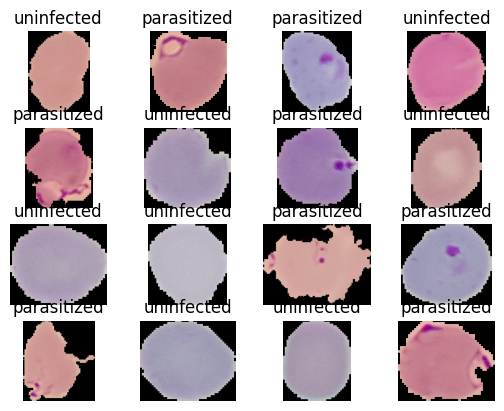

In [8]:
for i, (image, label) in enumerate(train_dataset.take(16)):
  ax = plt.subplot(4, 4, i+1)
  plt.title(dataset_info.features["label"].int2str(label))
  plt.axis("off")
  plt.imshow(image)

使Map進行預處理
tf.image.resize(image, (IM_SIZE, IM_SIZE)) 將圖像調整為指定的大小 (IM_SIZE, IM_SIZE)。這將確保所有的圖像都有相同的大小，以符合模型的輸入要求。

接著，/255. 對調整大小後的圖像進行了歸一化處理。除以 255 的目的是將像素值縮放到 0 到 1 的範圍內，以確保圖像的像素值符合模型的期望輸入範圍。

In [6]:
IM_SIZE = 224
def resize_rescale(image, label):
  return tf.image.resize(image, (IM_SIZE, IM_SIZE))/255., label

In [7]:
train_dataset = train_dataset.map(resize_rescale)
val_dataset = val_dataset.map(resize_rescale)
test_dataset = test_dataset.map(resize_rescale)

In [ ]:
for image, label in train_dataset.take(1):
  print(image, label)


tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]], shape=(224, 224, 3), dtype=float32) tf.Tensor(0, shape=(), dtype=int64)


打亂資料, batch大小設定

In [8]:
BATCH_SIZE = 32
train_dataset = train_dataset.shuffle(buffer_size=8, reshuffle_each_iteration=True).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [9]:
val_dataset = val_dataset.shuffle(buffer_size=8, reshuffle_each_iteration=True).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.shuffle(buffer_size=8, reshuffle_each_iteration=True).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

不錯的CNN概念網站
https://poloclub.github.io/cnn-explainer/

建立Model

In [10]:
from tensorflow.keras.layers import Dense, InputLayer, Conv2D, MaxPool2D, Flatten, BatchNormalization
model = tf.keras.Sequential([
    InputLayer(input_shape=(IM_SIZE,IM_SIZE,3)),

    # 建立filter , 第一層
    Conv2D(filters=6, kernel_size=3, strides=1, padding="valid", activation="relu"),
    BatchNormalization(),
    MaxPool2D(pool_size=2, strides=2),

    # 建立filter , 第二層
    Conv2D(filters=16, kernel_size=3, strides=1, padding="valid", activation="relu"),
    BatchNormalization(),
    MaxPool2D(pool_size=2, strides=2),

    # 攤平資料, 並建立輸出
    Flatten(),

    Dense(1000, activation='relu'),
    BatchNormalization(),

    Dense(100, activation='relu'),
    BatchNormalization(),

    Dense(1, activation='sigmoid'),

])

In [11]:
from keras.optimizers import Adam
from keras.engine.training import optimizer
from tensorflow.keras.metrics import RootMeanSquaredError, Accuracy
from tensorflow.keras.losses import BinaryCrossentropy
model.compile(
    optimizer = Adam(learning_rate=0.01),
    loss = BinaryCrossentropy(),
    metrics= ['acc']
)

In [ ]:
history = model.fit(train_dataset, validation_data=val_dataset, epochs=20, verbose=1)

Epoch 1/20
689/689 [==============================] - 82s 71ms/step - loss: 0.3666 - acc: 0.8367 - val_loss: 0.3638 - val_acc: 0.9009
Epoch 2/20
689/689 [==============================] - 53s 77ms/step - loss: 0.2097 - acc: 0.9287 - val_loss: 0.6756 - val_acc: 0.8512
Epoch 3/20
689/689 [==============================] - 49s 70ms/step - loss: 0.2022 - acc: 0.9326 - val_loss: 0.1870 - val_acc: 0.9485
Epoch 4/20
689/689 [==============================] - 55s 80ms/step - loss: 0.1832 - acc: 0.9365 - val_loss: 0.2035 - val_acc: 0.9412
Epoch 5/20
689/689 [==============================] - 49s 71ms/step - loss: 0.1650 - acc: 0.9441 - val_loss: 0.1814 - val_acc: 0.9405
Epoch 6/20
689/689 [==============================] - 55s 80ms/step - loss: 0.1566 - acc: 0.9470 - val_loss: 0.4048 - val_acc: 0.8011
Epoch 7/20
689/689 [==============================] - 48s 70ms/step - loss: 0.1710 - acc: 0.9404 - val_loss: 0.2739 - val_acc: 0.9452
Epoch 8/20
689/689 [==============================] - 52s 75ms

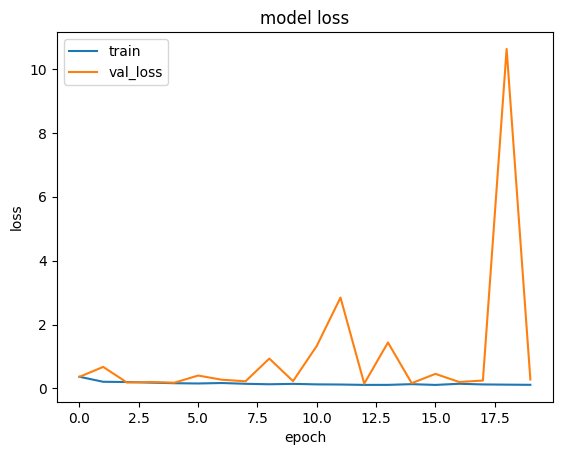

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(["train",'val_loss'])
plt.show()

In [ ]:
model.evaluate(test_dataset)

87/87 [==============================] - 16s 49ms/step - loss: 0.6945 - acc: 0.4904


[0.6945397257804871, 0.49038809537887573]

當x大於0.5時就代表被感染的機率大 , 所以顯示P
當小於0.5時就代表被感染的機率小 , 就顯示U
因為sigmoid輸出後是兩個結果相加等於1 , 也就是說可以當成機率來觀察
1就是100%

In [ ]:
def parasite_or_not(x):
  if (x<0.5):
    return str("P")
  else:
    return str("U")

In [ ]:
parasite_or_not(model.predict(test_dataset.take(1))[0])

1/1 [==============================] - 14s 14s/step


'P'

1/1 [==============================] - 12s 12s/step


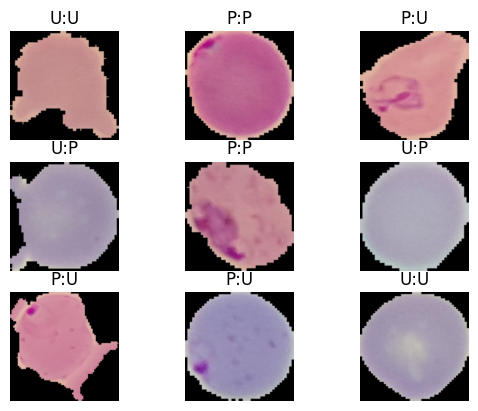

In [ ]:
for i, (image, label) in enumerate(test_dataset.take(9)):
  ax = plt.subplot(3,3,i+1)
  plt.imshow(image[0])
  plt.title(str(parasite_or_not(label.numpy()[0])) + ":" + str(parasite_or_not(model.predict(test_dataset.take(1))[0][0])))
  plt.axis("off")

儲存Model的訓練結果

In [ ]:
model.save("SaveModel")

加載Model

In [ ]:
new_model = tf.keras.models.load_model("SaveModel")
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 222, 222, 6)       168       
                                                                 
 batch_normalization_4 (Batc  (None, 222, 222, 6)      24        
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 6)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 109, 109, 16)      880       
                                                                 
 batch_normalization_5 (Batc  (None, 109, 109, 16)     64        
 hNormalization)                                                 
                                                      

用載入的New Model進行預測

In [ ]:
parasite_or_not(new_model.predict(test_dataset.take(1))[0])

1/1 [==============================] - 13s 13s/step


'P'

In [ ]:
model.save("SaveModel_hdf5.hdf5")

In [ ]:
new_model_hdf5 = tf.keras.models.load_model("SaveModel")
new_model_hdf5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 222, 222, 6)       168       
                                                                 
 batch_normalization_4 (Batc  (None, 222, 222, 6)      24        
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 6)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 109, 109, 16)      880       
                                                                 
 batch_normalization_5 (Batc  (None, 109, 109, 16)     64        
 hNormalization)                                                 
                                                      

In [ ]:
parasite_or_not(new_model_hdf5.predict(test_dataset.take(1))[0])

1/1 [==============================] - 12s 12s/step


'U'

只保存權重

In [ ]:
model.save_weights("weight/model_weight")

In [ ]:
# 測試model前後對比

In [ ]:
model = tf.keras.Sequential([
    InputLayer(input_shape=(IM_SIZE,IM_SIZE,3)),

    # 建立filter , 第一層
    Conv2D(filters=6, kernel_size=3, strides=1, padding="valid", activation="relu"),
    BatchNormalization(),
    MaxPool2D(pool_size=2, strides=2),

    # 建立filter , 第二層
    Conv2D(filters=16, kernel_size=3, strides=1, padding="valid", activation="relu"),
    BatchNormalization(),
    MaxPool2D(pool_size=2, strides=2),

    # 攤平資料, 並建立輸出
    Flatten(),

    Dense(1000, activation='relu'),
    BatchNormalization(),

    Dense(100, activation='relu'),
    BatchNormalization(),

    Dense(1, activation='sigmoid'),

])

model.compile(
    optimizer = Adam(learning_rate=0.01),
    loss = BinaryCrossentropy(),
    metrics= ['acc']
)

In [ ]:
model.evaluate(test_dataset)

87/87 [==============================] - 18s 38ms/step - loss: 0.6941 - acc: 0.4770


[0.6941472887992859, 0.4769677221775055]

In [ ]:
model_weight = model.load_weights("./weight/model_weight")      # 載入權重

In [ ]:
model.evaluate(test_dataset)

87/87 [==============================] - 17s 49ms/step - loss: 0.2908 - acc: 0.9162


[0.29080498218536377, 0.9162132740020752]

儲存到google drive

In [ ]:
from google.colab import drive

In [ ]:
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
!cp -r /content/SaveModel/ /content/drive/MyDrive/路徑/

In [ ]:
# 從之前儲存的路徑複製回到colab裡面

In [ ]:
!cp -r /content/drive/MyDrive/路徑/ /content/

Functional API

In [12]:
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

Functional API 常用來特徵提取, 上面跟下面的差別就是,特徵提取的話不需要最後面的輸出

In [13]:
func_input = Input(shape=(IM_SIZE,IM_SIZE,3), name="InputImage")

x = Conv2D(filters=6, kernel_size=3, strides=1, padding="valid", activation="relu")(func_input)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=2, strides=2)(x)

    # 建立filter , 第二層, 最後output提取特徵
x = Conv2D(filters=16, kernel_size=3, strides=1, padding="valid", activation="relu")(x)
x = BatchNormalization()(x)
output = MaxPool2D(pool_size=2, strides=2)(x)

    # 不需要建立輸出
# x = Flatten()(x)

# x = Dense(1000, activation='relu')(x)
# x = BatchNormalization()(x)

# x = Dense(100, activation='relu')(x)
# x = BatchNormalization()(x)

# func_output = Dense(1, activation='sigmoid')(x)

feature_model = Model(func_input, output, name="Feature_Extractor")

feature_model.summary()


Model: "Feature_Extractor"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputImage (InputLayer)     [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_2 (Conv2D)           (None, 222, 222, 6)       168       
                                                                 
 batch_normalization_4 (Batc  (None, 222, 222, 6)      24        
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 6)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 109, 109, 16)      880       
                                                                 
 batch_normalization_5 (Batc  (None, 109, 109, 16

In [23]:
# func_input = Input(shape=(IM_SIZE,IM_SIZE,3), name="InputImage")

# x = Conv2D(filters=6, kernel_size=3, strides=1, padding="valid", activation="relu")(func_input)
# x = BatchNormalization()(x)
# x = MaxPool2D(pool_size=2, strides=2)(x)

#     # 建立filter , 第二層
# x = Conv2D(filters=16, kernel_size=3, strides=1, padding="valid", activation="relu")(x)
# x = BatchNormalization()(x)
# x = MaxPool2D(pool_size=2, strides=2)(x)

#     # 攤平資料, 並建立輸出
# x = Flatten()(x)

# x = Dense(1000, activation='relu')(x)
# x = BatchNormalization()(x)

# x = Dense(100, activation='relu')(x)
# x = BatchNormalization()(x)

# func_output = Dense(1, activation='sigmoid')(x)

# model_func = Model(func_input, func_output, name="LeNetModel")

# model_func.summary()


Model: "LeNetModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputImage (InputLayer)     [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_8 (Conv2D)           (None, 222, 222, 6)       168       
                                                                 
 batch_normalization_16 (Bat  (None, 222, 222, 6)      24        
 chNormalization)                                                
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 111, 111, 6)      0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 109, 109, 16)      880       
                                                                 
 batch_normalization_17 (Bat  (None, 109, 109, 16)     6

取完特徵後丟到別的Model裡面進行訓練

In [14]:
func_input = Input(shape=(IM_SIZE,IM_SIZE,3), name="InputImage")

x = feature_model(func_input)     # 調用上面的feature_model特徵提取演算法

x = Flatten()(x)

x = Dense(100, activation='relu')(x)
x = BatchNormalization()(x)

x = Dense(10, activation='relu')(x)
x = BatchNormalization()(x)

func_output = Dense(1, activation="sigmoid")(x)

model_func = Model(func_input, func_output, name="LeNet_Model")

model_func.summary()

Model: "LeNet_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputImage (InputLayer)     [(None, 224, 224, 3)]     0         
                                                                 
 Feature_Extractor (Function  (None, 54, 54, 16)       1136      
 al)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 46656)             0         
                                                                 
 dense_3 (Dense)             (None, 100)               4665700   
                                                                 
 batch_normalization_6 (Batc  (None, 100)              400       
 hNormalization)                                                 
                                                                 
 dense_4 (Dense)             (None, 10)                

Model Subclassing
小Model, 提供調用
# **Funtional API 重點**

In [15]:
from tensorflow.keras.layers import Layer
class FeatureExtractor(Layer):
  def __init__(self, filters, kernel_size, strides, padding, activation, pool_size):
    # 建構特徵提取的模型
    super(FeatureExtractor, self).__init__()     ## 呼叫自己, 確保被初始化 ##
    self.conv_1 = Conv2D(filters=filters, kernel_size=kernel_size, strides=strides, padding=padding, activation=activation)
    self.batch_1 = BatchNormalization()
    self.pool_1 = MaxPool2D(pool_size=pool_size, strides=strides*2)

    self.conv_2 = Conv2D(filters=filters*2, kernel_size=kernel_size, strides=strides, padding=padding, activation=activation)
    self.batch_2 = BatchNormalization()
    self.pool_2 = MaxPool2D(pool_size=pool_size, strides=strides*2)


  def call(self, x, training):
    x = self.conv_1(x)
    x = self.batch_1(x)
    x = self.pool_1(x)

    x = self.conv_2(x)
    x = self.batch_2(x)
    x = self.pool_2(x)

    return x

# 使用提取特徵模型
feature_sub_classed = FeatureExtractor(8, 3, 1, "valid", "relu", 2)

In [17]:
# 上面是建立特徵提取Model, 這邊要建立訓練模型

class LeNetModel(Model):
  def __init__(self,):
    super(LeNetModel, self).__init__()

    self.feature_extractor = FeatureExtractor(8, 3, 1, "valid", "relu", 2)

    self.flatten = Flatten()
    self.dense_1 = Dense(100, activation='relu')
    self.batch_1 = BatchNormalization()

    self.dense_2 = Dense(10, activation='relu')
    self.batch_2 = BatchNormalization()

    self.dense_3 = Dense(1, activation="sigmoid")

  def call(self, x, training):
    x = self.feature_extractor(x)

    x = self.flatten(x)
    x = self.dense_1(x)
    x = self.batch_1(x)
    x = self.dense_2(x)
    x = self.batch_2(x)
    x = self.dense_3(x)

    return x

lenet_sub_classed = LeNetModel()
lenet_sub_classed(tf.zeros([1,224,224,3]))      # 隨便建立一個tensor來進行model的測試
lenet_sub_classed.summary()


Model: "le_net_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extractor_1 (Featur  multiple                 1488      
 eExtractor)                                                     
                                                                 
 flatten_3 (Flatten)         multiple                  0         
                                                                 
 dense_9 (Dense)             multiple                  4665700   
                                                                 
 batch_normalization_14 (Bat  multiple                 400       
 chNormalization)                                                
                                                                 
 dense_10 (Dense)            multiple                  1010      
                                                                 
 batch_normalization_15 (Bat  multiple                

In [18]:
lenet_sub_classed.compile(
    optimizer = Adam(learning_rate=0.01),
    loss = BinaryCrossentropy(),
    metrics = "accuracy"
)

In [21]:
history = lenet_sub_classed.fit(train_dataset, validation_data=val_dataset, epochs=75, verbose=1)

Epoch 1/75
 71/689 [==>...........................] - ETA: 7:47 - loss: 0.6036 - accuracy: 0.6765

KeyboardInterrupt: ignored

# 自定義層

*   對於大多數情況下，我們希望訓練模型時更新所有層的權重，因此 trainable=True 是預設值。這使得模型能夠學習從輸入到輸出之間的最佳權重配置，以最小化損失函數。


*   有時候，我們可能想要凍結某些層或某些參數，即不對它們進行訓練。這可以通過將 trainable=False 來實現。凍結層或參數意味著在訓練過程中不更新它們的權重，保持它們的初始值。這在一些情況下很有用，例如在遷移學習中，我們可能想要固定某些預訓練模型的權重，只訓練新添加的層。

*   initializer="random_normal" 是一種初始化方法的選擇, "random_normal" 初始化器中，它根據正態分佈（高斯分佈）生成具有指定均值和標準差的隨機數值作為初始值

*   tf.nn.relu() 和 Dense(100, activation='relu') 中的 activation='relu' 是相同的意思，都是指定修正線性單元（ReLU）作為激活函數, 下面的sigmoid同樣意思, 由於是自定義層 , 所以這個要自己定義
*   self.weights 屬性會與 Layer 父類中的只讀屬性名稱衝突，所以不能使用 self.weights 來命名權重變數, 故使用self.w





In [34]:
# 可以建立自己的Dense
class NeuralearnDense(Layer):
  def __init__(self, output_units, activation):
    super(NeuralearnDense, self).__init__()

    self.output_units = output_units
    self.activation = activation

  def build(self, input_feature_shape):
    self.w = self.add_weight(shape=(input_feature_shape[-1], self.output_units), initializer="random_normal", trainable=True)    # 設定初始權重, 取最後一個是因為最後一個維度是特徵的總數
    self.b = self.add_weight(shape=(self.output_units, ), initializer="random_normal", trainable=True)        # 設定初始偏差值


  def call(self, input_features):
    pred_output = tf.matmul(input_features, self.w) + self.b
    if (self.activation == "relu"):
      return tf.nn.relu(pred_output)
    elif (self.activation == "sigmoid"):
      return tf.math.sigmoid(pred_output)
    else:
      return pred_output




In [39]:
new_custom_model = tf.keras.Sequential([
    InputLayer(input_shape=(IM_SIZE,IM_SIZE,3)),

    Conv2D(filters=6, kernel_size=3, strides=1, padding="valid", activation="relu"),
    BatchNormalization(),
    MaxPool2D(pool_size=2, strides=2),

    Conv2D(filters=16, kernel_size=3, strides=1, padding="valid", activation="relu"),
    BatchNormalization(),
    MaxPool2D(pool_size=2, strides=2),

    Flatten(),

    NeuralearnDense(100, activation='relu'),      # 這邊改成剛剛上面建立的NeuralearnDense
    BatchNormalization(),

    NeuralearnDense(10, activation='relu'),      # 這邊改成剛剛上面建立的NeuralearnDense
    BatchNormalization(),

    NeuralearnDense(1, activation='sigmoid'),      # 這邊改成剛剛上面建立的NeuralearnDense

])

new_custom_model.summary()

new_custom_model.compile(
    optimizer = Adam(learning_rate=0.01),
    loss = BinaryCrossentropy(),
    metrics= ['acc']
)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 222, 222, 6)       168       
                                                                 
 batch_normalization_44 (Bat  (None, 222, 222, 6)      24        
 chNormalization)                                                
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 111, 111, 6)      0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 109, 109, 16)      880       
                                                                 
 batch_normalization_45 (Bat  (None, 109, 109, 16)     64        
 chNormalization)                                                
                                                      

In [38]:
history = new_custom_model.fit(train_dataset, validation_data=val_dataset, epochs=5, verbose=1)

Epoch 1/5
 47/689 [=>............................] - ETA: 8:49 - loss: 0.6730 - acc: 0.5731

KeyboardInterrupt: ignored